In [32]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm.auto import tqdm
tqdm.pandas()

plt.rcParams["figure.figsize"] = (16, 12)
warnings.simplefilter("ignore")



In [35]:
current_dataset = 5
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110815-fast-flux.pcap',
 'capture20110815-2.binetflow',
 'e4f816462c4fc84bb250e2b1d295bf23_85f9a5247afbe51e64794193f1dd72eb_unpacked.exe',
 'README']

In [36]:
[i for i in os.listdir(path) if i.endswith(".binetflow") ]

['capture20110815-2.binetflow']

In [37]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/15 16:43:28.078942,0.000000,tcp,114.33.245.44,6881,?>,147.32.84.118,1567,RA_,0.0,0.0,1,60,60,flow=Background
1,2011/08/15 16:43:32.283576,13.431962,tcp,212.93.105.52,49237,->,147.32.84.229,80,SRA_SA,0.0,0.0,6,388,208,flow=Background-TCP-Established
2,2011/08/15 16:43:32.456441,13.350228,tcp,212.93.105.52,14906,->,147.32.84.229,13363,SRA_SA,0.0,0.0,6,388,208,flow=Background-TCP-Established
3,2011/08/15 16:43:32.850648,13.010090,tcp,212.93.105.52,60349,->,147.32.84.229,443,SRA_SA,0.0,0.0,6,388,208,flow=Background-TCP-Established
4,2011/08/15 16:45:09.305002,20.990047,tcp,115.127.24.116,3198,->,147.32.84.229,443,SR_SA,0.0,0.0,5,308,122,flow=Background-TCP-Established
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129827,2011/08/15 17:13:26.665269,0.020175,tcp,147.32.84.59,1121,->,147.32.80.13,80,SPA_SPA,0.0,0.0,5,1070,726,flow=To-Background-CVUT-Proxy
129828,2011/08/15 17:13:26.715751,0.000306,udp,147.32.86.20,63044,<->,147.32.80.9,53,CON,0.0,0.0,2,261,84,flow=To-Background-UDP-CVUT-DNS-Server
129829,2011/08/15 17:13:26.716285,0.076739,tcp,147.32.86.20,1311,->,188.138.84.239,80,SPA_SA,0.0,0.0,10,3639,429,flow=Background-TCP-Established
129830,2011/08/15 17:13:26.721279,0.000244,tcp,78.94.167.118,65017,->,147.32.84.118,6881,S_RA,0.0,0.0,2,134,74,flow=Background-TCP-Attempt


In [38]:
def preprocess_df(df): 
    df['Sport'] = df['Sport'].fillna(-1)
    df['Dport'] = df['Dport'].fillna(-1)
    df["Backgroung_label"] = df.Label.str.contains("Background")
    df["Normal_label"] = df.Label.str.contains("Normal")
    df["Botnet_label"] = df.Label.str.contains("Botnet")
    df["StartTime"] = pd.to_datetime(df["StartTime"])
    df.sort_values("StartTime", inplace = True)
    return df
df = preprocess_df(df)
#df = df.iloc[0:500]

In [39]:
df.describe()

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes
count,129832.000000,128974.000000,122936.000000,129832.000000,1.298320e+05,1.298320e+05
mean,77.439645,0.049382,0.000724,34.514927,2.883615e+04,5.081775e+03
std,282.290550,3.024701,0.043716,2494.261137,2.962769e+06,5.179676e+05
min,0.000000,0.000000,0.000000,1.000000,6.000000e+01,0.000000e+00
25%,0.000304,0.000000,0.000000,2.000000,2.140000e+02,7.600000e+01
50%,0.000739,0.000000,0.000000,2.000000,2.660000e+02,8.100000e+01
75%,0.643476,0.000000,0.000000,6.000000,7.410000e+02,4.600000e+02
max,1805.828491,192.000000,3.000000,694553.000000,8.537041e+08,1.365468e+08


In [40]:
df.Proto.value_counts()

udp          95540
tcp          31899
icmp          2062
igmp           150
arp             71
rtcp            68
rtp             28
ipv6-icmp       11
ipx/spx          1
pim              1
rsvp             1
Name: Proto, dtype: int64

In [41]:
df.Dir.value_counts()

  <->    92606
   ->    34748
  <?>     1512
  <-       570
   ?>      325
  who       71
Name: Dir, dtype: int64

<AxesSubplot: >

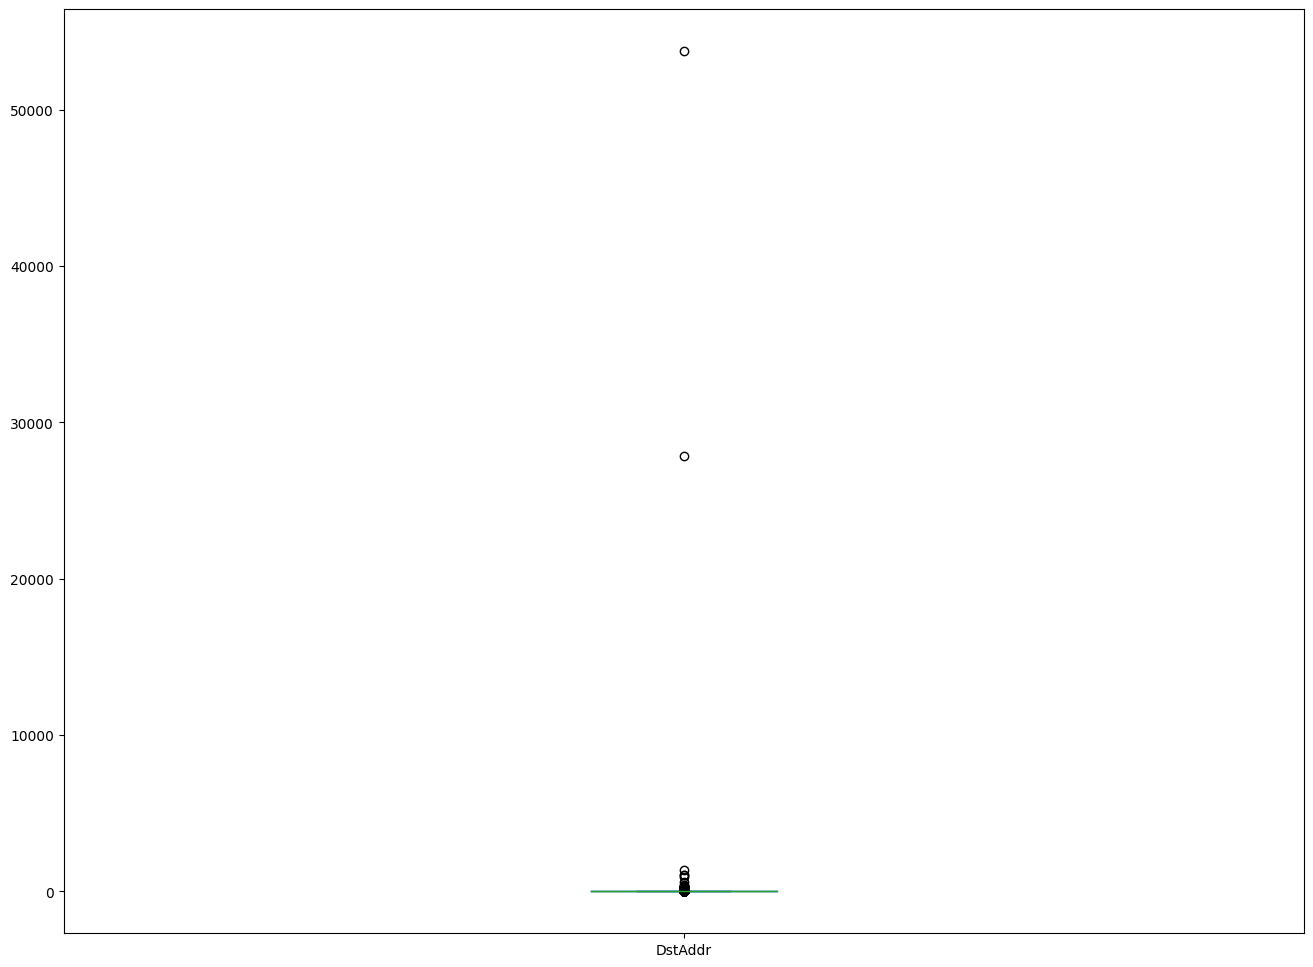

In [42]:
df.DstAddr.value_counts().plot.box()

<AxesSubplot: >

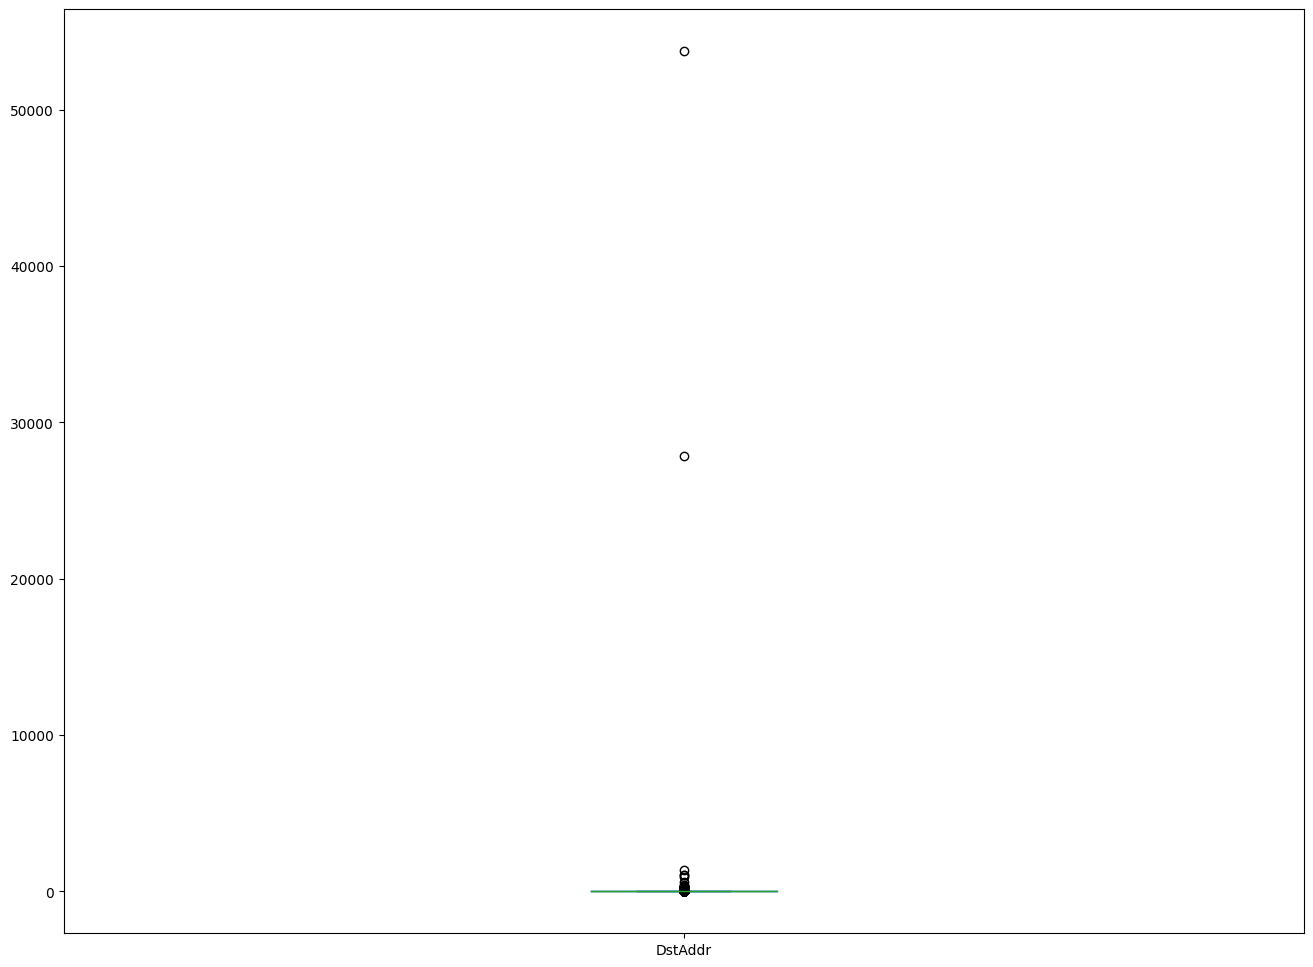

In [43]:
df.DstAddr.value_counts().plot.box()

Text(0.5, 1.0, 'Count of unique Distant Adress, Source Port, Distant Port aggregated by IP source')

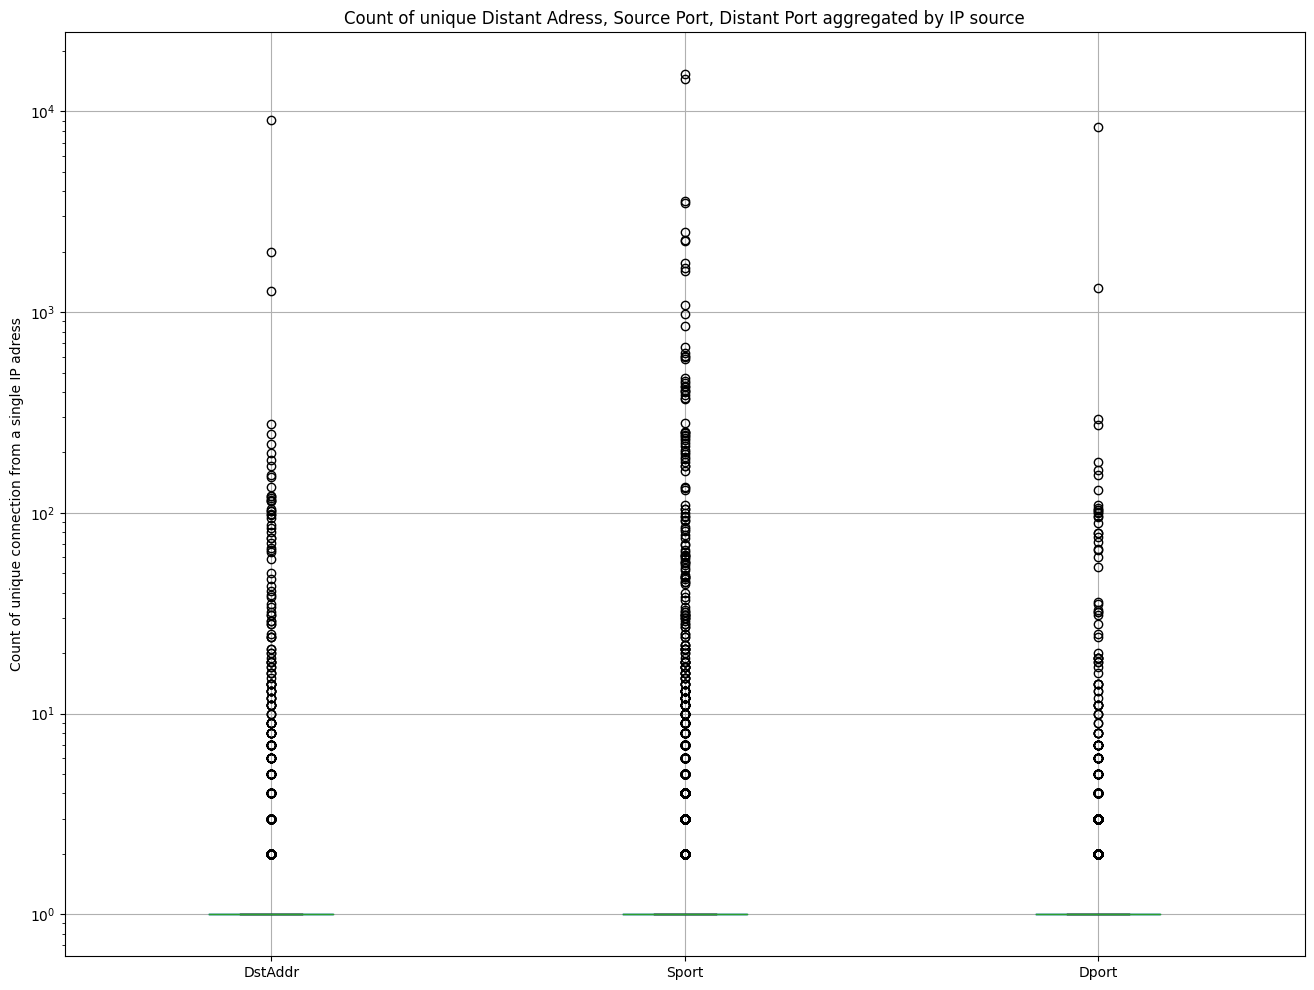

In [44]:

ma_agg = lambda x : len(x.unique())
new_tmp = df.groupby(by="SrcAddr").agg({"DstAddr" :ma_agg , "Sport":ma_agg, "Dport":ma_agg})
ax = new_tmp.boxplot()
ax.set_yscale('log')

plt.ylabel("Count of unique connection from a single IP adress")
plt.title("Count of unique Distant Adress, Source Port, Distant Port aggregated by IP source")

Text(0, 0.5, 'TotBytes exchanged (log)')

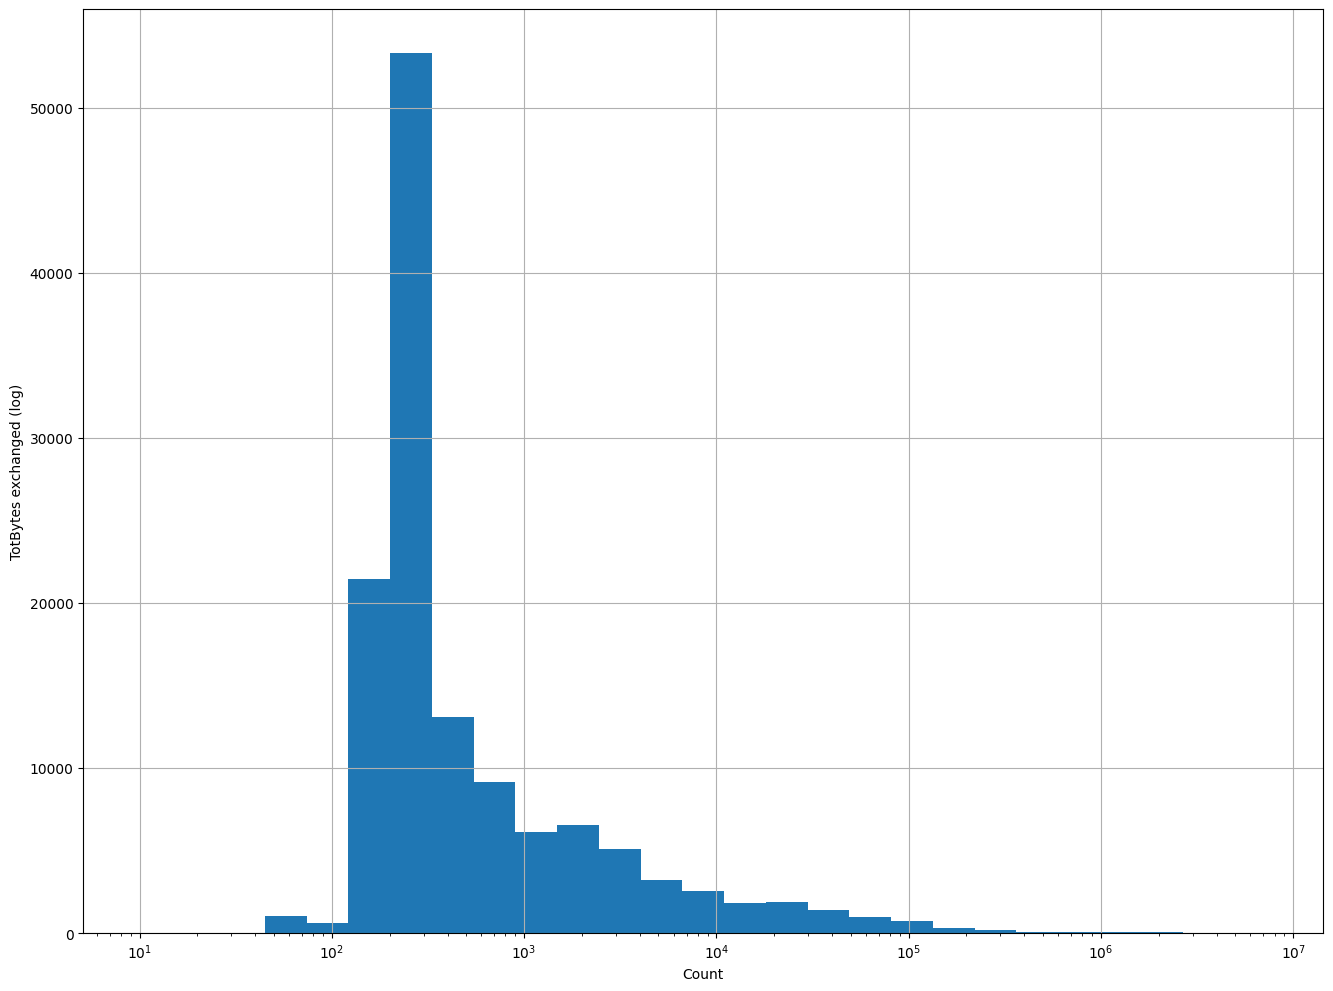

In [45]:
ax = df.TotBytes.hist(bins = 10*np.exp(np.arange(0,14,0.5)))
ax.set_xscale('log')
plt.xlabel("Count")
plt.ylabel("TotBytes exchanged (log)")

**Let's check if a single src IP can have multiples labels :**

In [ ]:
analysis_label = df.groupby(by = "SrcAddr").agg({'Backgroung_label': np.mean,'Normal_label': np.mean,'Botnet_label': np.mean})

In [ ]:
df["Backgroung_label"] = df.Label.str.contains("Background")
df["Normal_label"] = df.Label.str.contains("Normal")
df["Botnet_label"] = df.Label.str.contains("Botnet")

In [ ]:
cur = "Backgroung_label"
analysis_label[cur][(analysis_label[cur]!=1) & (analysis_label[cur]!=0)]

In [ ]:
cur = "Normal_label"
analysis_label[cur][(analysis_label[cur]!=1) & (analysis_label[cur]!=0)]

In [ ]:
cur = "Botnet_label"
analysis_label[cur][(analysis_label[cur]!=1) & (analysis_label[cur]!=0)]

In [ ]:
# the list of the botnets :
analysis_label[cur][(analysis_label[cur]!=0)]

**L'adresse IP n'est pas constamment considérée comme malicieuse..., il faudra donc adapter nos labels lorsque nous agrègerons
Le mieux à faire est probablement : une ip src est malicieuse si à une seul moment elle a un label botnet.**


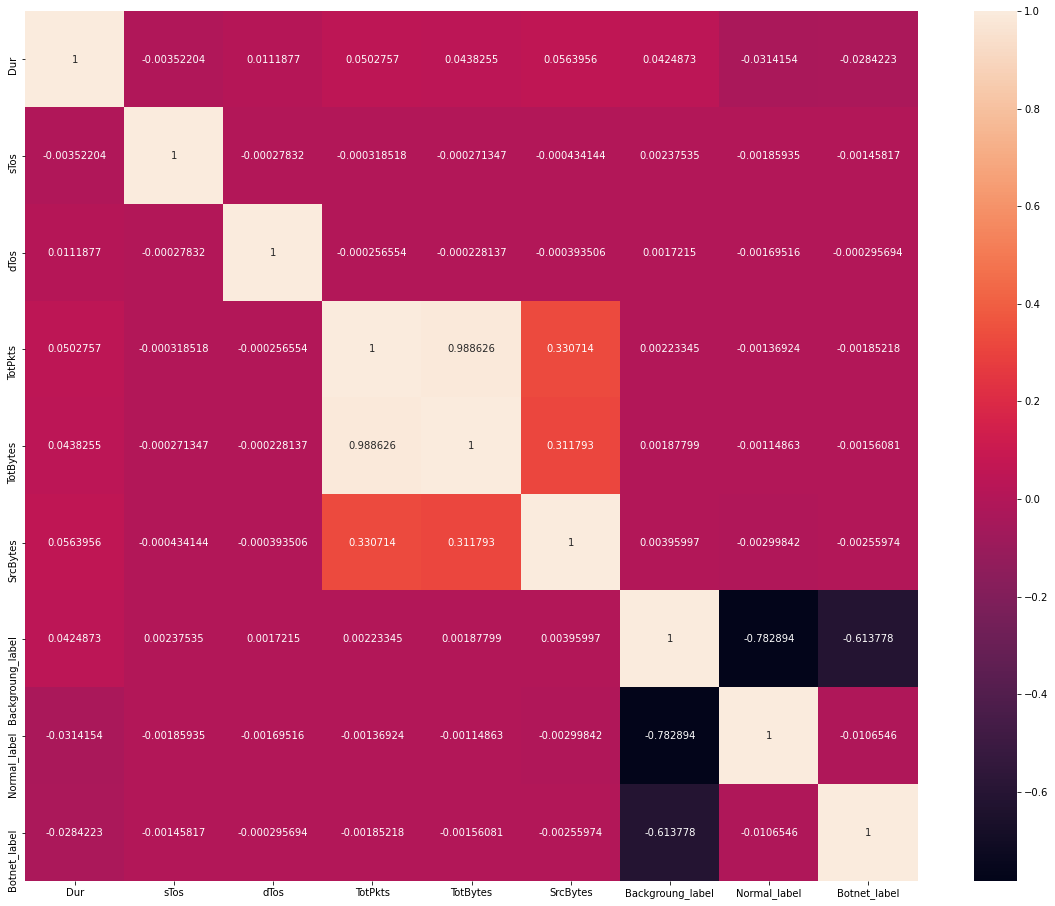

In [21]:
df_corr = df.corr()

ax= plt.subplot()
sns.heatmap(df_corr, annot=True, fmt='g', ax=ax); 


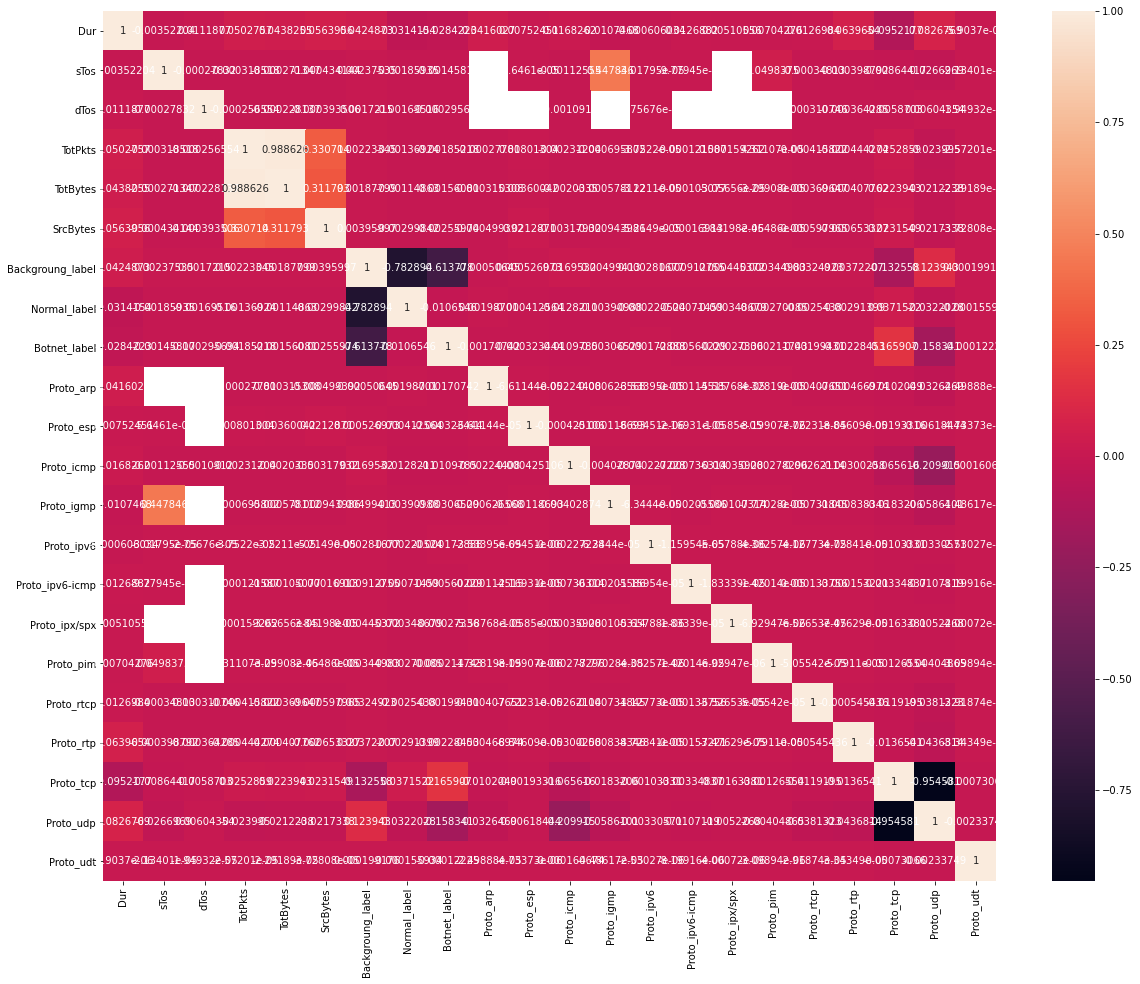

In [22]:
columns_to_one_hot = ["Proto"]#, "Dir", "State" ]


def plot_corr_matrix_for_one_hot(df, col_name) :
    one_hot_df = df.copy()
    one_hot = pd.get_dummies(df[col_name], prefix=col_name)
    one_hot_df = one_hot_df.join(one_hot)
    
    df_corr_one = one_hot_df.corr()
    ax= plt.subplot()
    sns.heatmap(df_corr_one, annot=True, fmt='g', ax=ax)
    
plot_corr_matrix_for_one_hot(df, "Proto")

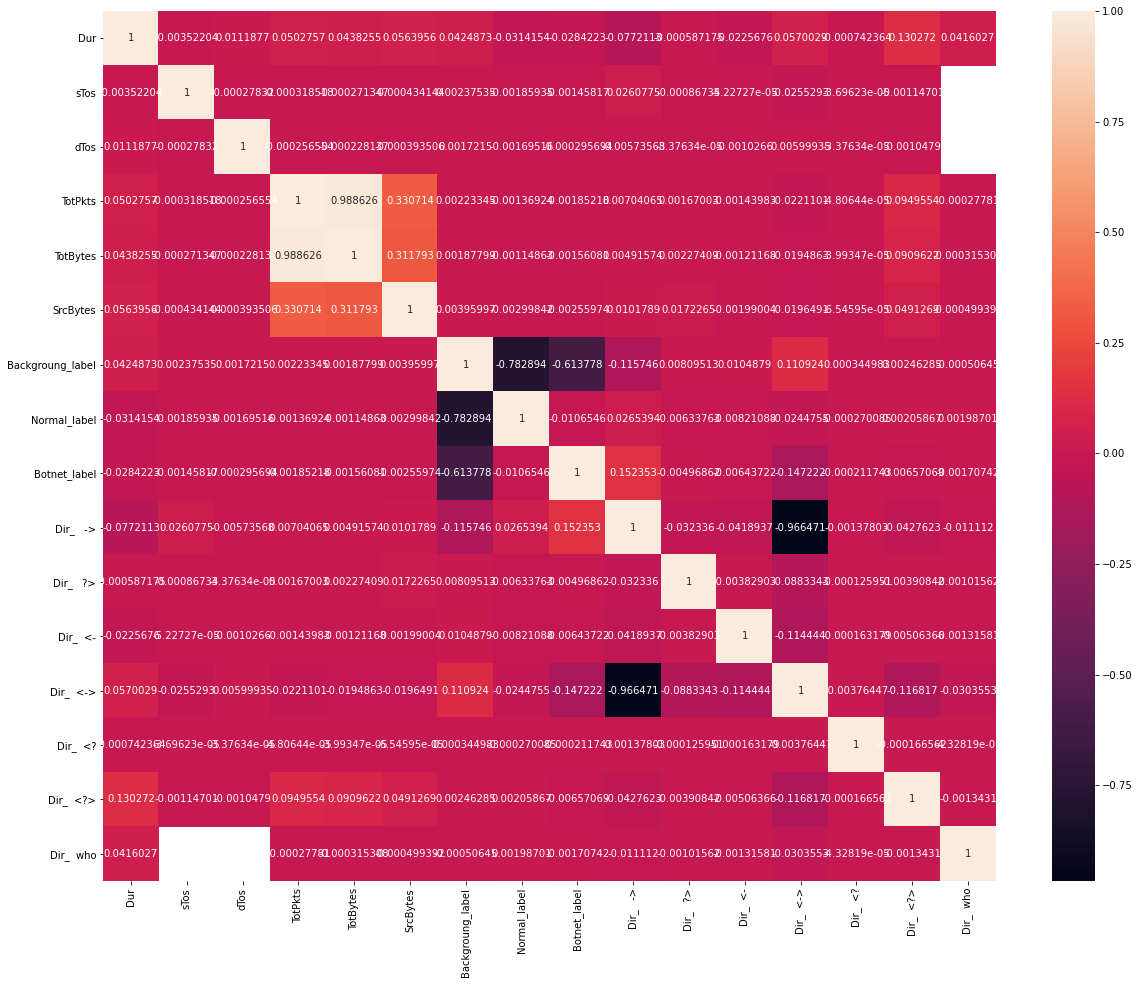

In [23]:
plot_corr_matrix_for_one_hot(df, "Dir")


In [24]:
#plot_corr_matrix_for_one_hot(df, "State")


In [25]:
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
0,2011/08/16 10:04:03.820235,0.286751,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,True,False,False
1,2011/08/16 10:04:04.106986,0.280358,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,True,False,False
2,2011/08/16 10:04:04.387344,0.280039,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,True,False,False
3,2011/08/16 10:02:54.155092,138.123184,tcp,147.32.84.59,49158,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,12,2636,638,flow=Background-Established-cmpgw-CVUT,True,False,False
4,2011/08/16 10:07:24.648890,0.306994,tcp,67.210.234.171,3255,->,147.32.84.142,80,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558914,2011/08/16 12:10:56.783227,0.000241,udp,147.32.84.59,47132,<->,147.32.80.9,53,CON,0.0,0.0,2,230,90,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558915,2011/08/16 12:10:56.783863,0.000360,udp,147.32.84.59,33462,<->,147.32.80.9,53,CON,0.0,0.0,2,307,86,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558916,2011/08/16 12:10:56.783922,0.000419,udp,147.32.84.59,50059,<->,147.32.80.9,53,CON,0.0,0.0,2,254,77,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558917,2011/08/16 12:10:56.802376,0.041333,tcp,84.42.129.253,33357,->,147.32.84.36,443,SPA_SPA,0.0,0.0,15,6824,1142,flow=Background-TCP-Established,True,False,False


# MINDS

Features considered : 

- the number of NetFlows from the same **source IP address** as the evaluated NetFlow
- the number of NetFlows toward the same **destination host**
- the number of NetFlows towards the same **destination host** from the same **source port**
- the number of NetFlows from the same **source host** towards the same **destination port**.

<AxesSubplot:>

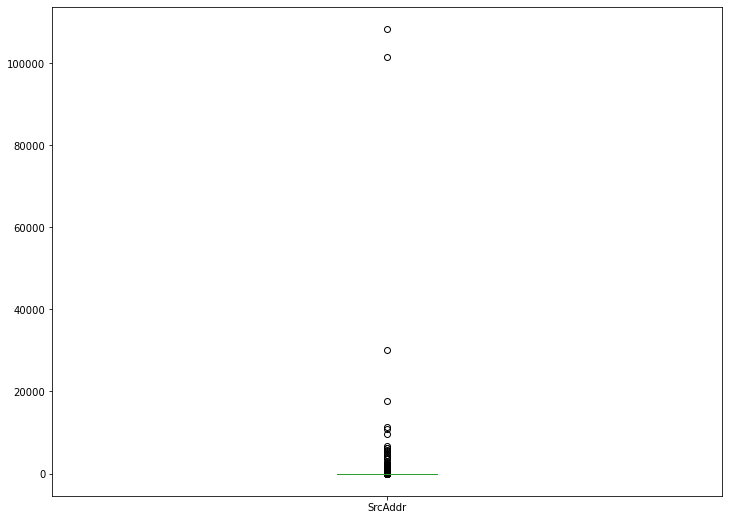

In [26]:
plt.rcParams["figure.figsize"] = (12, 9)
df.SrcAddr.value_counts().reset_index(drop=True).plot.box()


<AxesSubplot:>

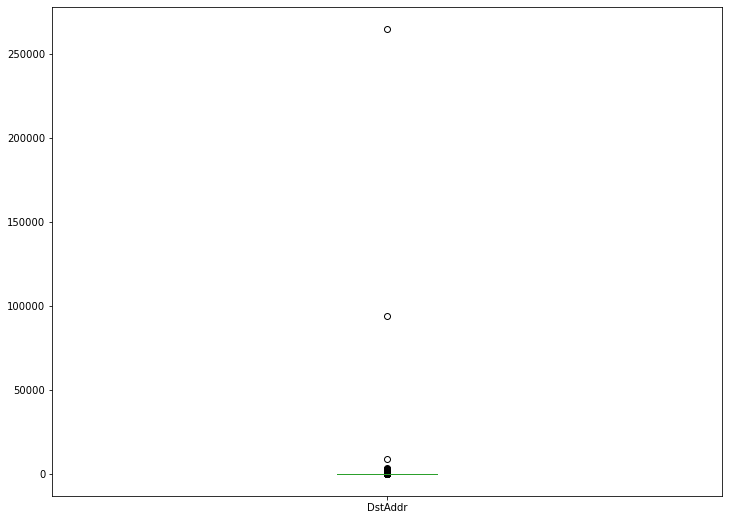

In [27]:
df.DstAddr.value_counts().reset_index(drop=True).plot.box()

<AxesSubplot:>

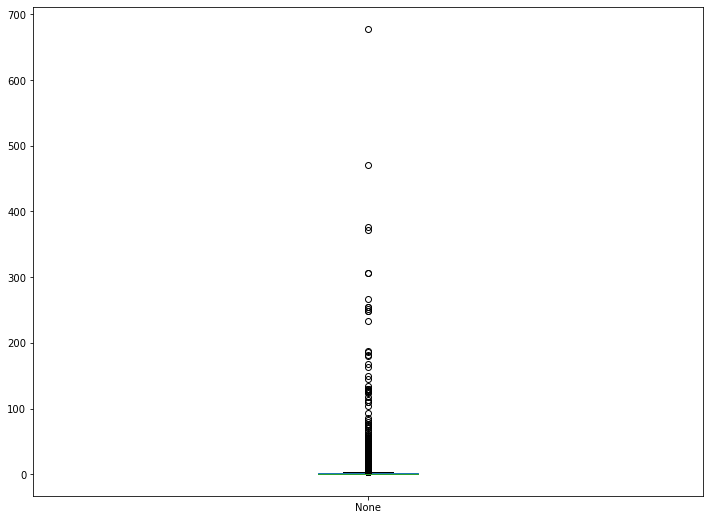

In [28]:
df[["DstAddr","Sport"]].value_counts().plot.box()

<AxesSubplot:>

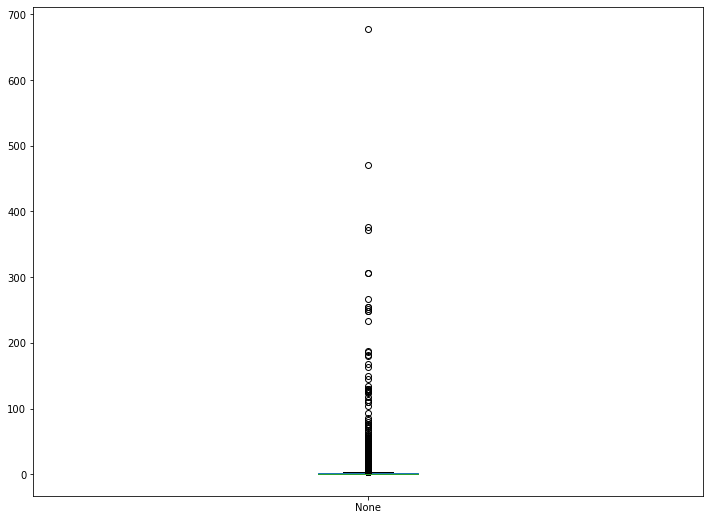

In [29]:

df[["DstAddr","Sport"]].value_counts().plot.box()

The anomaly value for a NetFlow is based on **its distance to the normal sample.** The metric defined in this **four dimensional context space uses a logarithmic scale** on each
context dimension, and these marginal distances are combined
into the global distance as **the sum of their squares**. 

In the CAMNEP implementation of this algorithm, the variance adjusted difference between the floating average of past
values and the evaluated NetFlow on each of the four context
dimensions is used to know if the evaluated NetFlow is
anomalous. The original work is based on the combination of
computationally-intensive clustering and human intervention.

In [30]:
df_for_minds = df[["SrcAddr","DstAddr","Sport", "Dport","Label","Backgroung_label","Normal_label","Botnet_label"]]

In [31]:
df_for_minds

,SrcAddr,DstAddr,Sport,Dport,Label,Backgroung_label,Normal_label,Botnet_label
0,67.210.234.162,147.32.86.98,3597,80,flow=Background-TCP-Attempt,True,False,False
1,67.210.234.162,147.32.86.98,3597,80,flow=Background-TCP-Attempt,True,False,False
2,67.210.234.162,147.32.86.98,3597,80,flow=Background-TCP-Attempt,True,False,False
3,147.32.84.59,147.32.80.7,49158,80,flow=Background-Established-cmpgw-CVUT,True,False,False
4,67.210.234.171,147.32.84.142,3255,80,flow=Background-TCP-Attempt,True,False,False
...,...,...,...,...,...,...,...,...
558914,147.32.84.59,147.32.80.9,47132,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558915,147.32.84.59,147.32.80.9,33462,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558916,147.32.84.59,147.32.80.9,50059,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558917,84.42.129.253,147.32.84.36,33357,443,flow=Background-TCP-Established,True,False,False


In [32]:

def adapt_df_to_minds_features(df) :

    print("Computing Count_Same_Src_Host ....")
    values_counts_src_ip = df.SrcAddr.value_counts()
    df["Count_Same_Src_Host"] = df["SrcAddr"].progress_apply(lambda x : values_counts_src_ip.loc[x])

    print("Computing Count_Same_Dest_Host ....")
    values_counts_dest_ip = df.DstAddr.value_counts()
    df["Count_Same_Dest_Host"] = df["DstAddr"].progress_apply(lambda x : values_counts_dest_ip.loc[x])

    print("Computing Count_Same_Dest_Host_Src_port ....")
    values_counts_dest_ip_source_port = df[["DstAddr","Sport"]].value_counts()
    df["Count_Same_Dest_Host_Src_port"] = df.progress_apply(lambda x : values_counts_dest_ip_source_port.loc[x["DstAddr"],x["Sport"]], axis= 1)
    

    print("Computing Count_Same_Src_Host_Dest_port ....")
    values_counts_source_ip_dest_port = df[["SrcAddr","Dport"]].value_counts()
    df["Count_Same_Src_Host_Dest_port"] = df.progress_apply(lambda x : values_counts_source_ip_dest_port.loc[x["SrcAddr"],x["Dport"]], axis= 1)
    
    
    return df
    
    
df_minds_contexts = adapt_df_to_minds_features(df_for_minds)
df_minds_contexts

Computing Count_Same_Src_Host ....


  0%|          | 0/558919 [00:00<?, ?it/s]

Computing Count_Same_Dest_Host ....


  0%|          | 0/558919 [00:00<?, ?it/s]

Computing Count_Same_Dest_Host_Src_port ....


  0%|          | 0/558919 [00:00<?, ?it/s]

Computing Count_Same_Src_Host_Dest_port ....


  0%|          | 0/558919 [00:00<?, ?it/s]

,SrcAddr,DstAddr,Sport,Dport,Label,Backgroung_label,Normal_label,Botnet_label,Count_Same_Src_Host,Count_Same_Dest_Host,Count_Same_Dest_Host_Src_port,Count_Same_Src_Host_Dest_port
0,67.210.234.162,147.32.86.98,3597,80,flow=Background-TCP-Attempt,True,False,False,5,18,4,5
1,67.210.234.162,147.32.86.98,3597,80,flow=Background-TCP-Attempt,True,False,False,5,18,4,5
2,67.210.234.162,147.32.86.98,3597,80,flow=Background-TCP-Attempt,True,False,False,5,18,4,5
3,147.32.84.59,147.32.80.7,49158,80,flow=Background-Established-cmpgw-CVUT,True,False,False,101364,643,4,27899
4,67.210.234.171,147.32.84.142,3255,80,flow=Background-TCP-Attempt,True,False,False,5,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
558914,147.32.84.59,147.32.80.9,47132,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,101364,264717,8,55737
558915,147.32.84.59,147.32.80.9,33462,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,101364,264717,8,55737
558916,147.32.84.59,147.32.80.9,50059,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,101364,264717,13,55737
558917,84.42.129.253,147.32.84.36,33357,443,flow=Background-TCP-Established,True,False,False,3,318,1,3


In [33]:
new_columns = ["Count_Same_Src_Host","Count_Same_Dest_Host","Count_Same_Dest_Host_Src_port","Count_Same_Src_Host_Dest_port"]

In [34]:
for col in tqdm(new_columns) :
    df_minds_contexts[col] = np.log10(df_minds_contexts[col])

df_minds_contexts[""]=

SyntaxError: invalid syntax (<ipython-input-34-fa29fc9897f7>, line 4)

In [ ]:
df_minds_contexts

# Lakhina Volume

In [ ]:
df_for_Lakhina = df[["SrcAddr","TotBytes","TotPkts","Label","Backgroung_label","Normal_label","Botnet_label"]]
df_for_Lakhina

In [ ]:
context_lakhina_vol = df_for_Lakhina.groupby(by = "SrcAddr").agg({'TotBytes': 'sum', 'TotPkts': 'sum','SrcAddr':'count'})

context_lakhina_vol.rename(columns = {"SrcAddr" : "Netflows"}, inplace = True)
context_lakhina_vol


#  Lakhina Entropy

The entropy prediction algorithm presented by Lakhina et al. (2005) is based on the similar PCA-based traffic model than
Section 3.2.3, but it uses different features. It **aggregates the
traffic from the individual source IP addresses**, but instead of
traffic volumes, it predicts the **entropies of destination IP addresses**, **destination ports** and **source ports** 
over the set of context NetFlows for each source. The context space is
therefore three dimensional. 

An anomaly is determined as the
normalized sum of residual entropy over all three dimensions.
The metric is simple: a function measures the difference of
residual entropies between the NetFlows and aggregates their
squares. Also, the original anomaly detection method was
significantly modified along the same lines as the volume
prediction algorithm

In [ ]:
df_for_Lakhina_Entropy = df[["SrcAddr","DstAddr","Sport", "Dport","Label","Backgroung_label","Normal_label","Botnet_label"]]
df_for_Lakhina_Entropy

In [ ]:
# On doit mesurer l entropie pour chaque aggreg, mais jsp comment cette entropie est calculée.

context_lakhina_Entropy = df_for_Lakhina_Entropy.groupby(by = "SrcAddr").agg({'DstAddr': pd.Series.nunique,
                                                                              'Dport': pd.Series.nunique,
                                                                              'Sport': pd.Series.nunique})

context_lakhina_Entropy.rename(columns = {"SrcAddr" : "Netflows"}, inplace = True)
context_lakhina_Entropy


# Flags

The Flags detector uses the same detection method as the KGB
detector (Pevny´ et al., 2012). The only difference is in the input
feature vector. The feature vector of the Flags detector is
determined by the **histogram of the TCP Flags** of all the NetFlows with the **same IP address**. 
This detector is looking for a sequence or a combination of anomalous TCP flags

In [ ]:
df

In [ ]:
df_for_Flags = df[["SrcAddr","Proto","State","Label","Backgroung_label","Normal_label","Botnet_label"]]
df_for_Flags = df_for_Flags[df_for_Flags.Proto == 'tcp']

In [ ]:
# les flags sont dans state ?
df_for_Flags.State.value_counts()